In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from mtcnn.mtcnn import MTCNN 
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

## **Frontal**

In [4]:
frontal = cv2.imread('/content/drive/MyDrive/face_recognition/dataset/jenna_ortega/1.jpg')
image = cv2.cvtColor(frontal, cv2.COLOR_BGR2RGB)

### **MTCNN**

In [5]:
detector = MTCNN()

In [6]:
output = detector.detect_faces(image)

for faces in output:
  print(faces)

1/1 [==============================] - 1s 617ms/step
{'box': [446, 394, 449, 601], 'confidence': 0.9993181824684143, 'keypoints': {'left_eye': (583, 618), 'right_eye': (810, 620), 'nose': (727, 746), 'mouth_left': (616, 852), 'mouth_right': (782, 850)}}


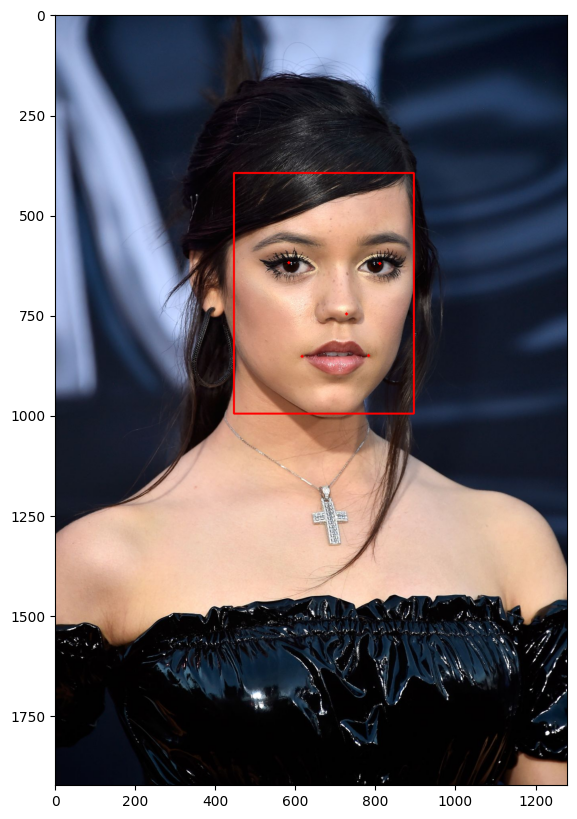

In [7]:
for i in output:
  x, y, width, height = i['box']

  left_eyeX, left_eyeY = i['keypoints']['left_eye']
  right_eyeX, right_eyeY = i['keypoints']['right_eye']
  noseX, noseY = i['keypoints']['nose']
  mouth_leftX, mouth_leftY = i['keypoints']['mouth_left']
  mouth_rightX, mouth_rightY = i['keypoints']['mouth_right']

  cv2.circle(image, center = (left_eyeX, left_eyeY), color = (255, 0, 0), thickness = 3, radius = 2)
  cv2.circle(image, center = (right_eyeX, right_eyeY), color = (255, 0, 0), thickness = 3, radius = 2)
  cv2.circle(image, center = (noseX, noseY), color = (255, 0, 0), thickness = 3, radius = 2)
  cv2.circle(image, center = (mouth_leftX, mouth_leftY), color = (255, 0, 0), thickness = 3, radius = 2)
  cv2.circle(image, center = (mouth_rightX, mouth_rightY), color = (255, 0, 0), thickness = 3, radius = 2)

  cv2.rectangle(image, pt1 = (x, y), pt2 = (x + width, y + height), color=(255, 0, 0), thickness = 3)

figure(figsize=(20, 10))
plt.imshow(image)

## **Inception V3**

In [8]:
import time
from tensorflow.keras.models import load_model
import pickle

In [9]:
# load trained model
model = load_model('/content/drive/My Drive/Colab Notebooks/facedetector-model.h5')

# unpack pkl file
labels = ""

with open('/content/drive/My Drive/Colab Notebooks/labels.pkl', 'rb') as pf:
  labels = pickle.load(pf)
labels

{0: 'face'}

1/1 [==============================] - 1s 1s/step


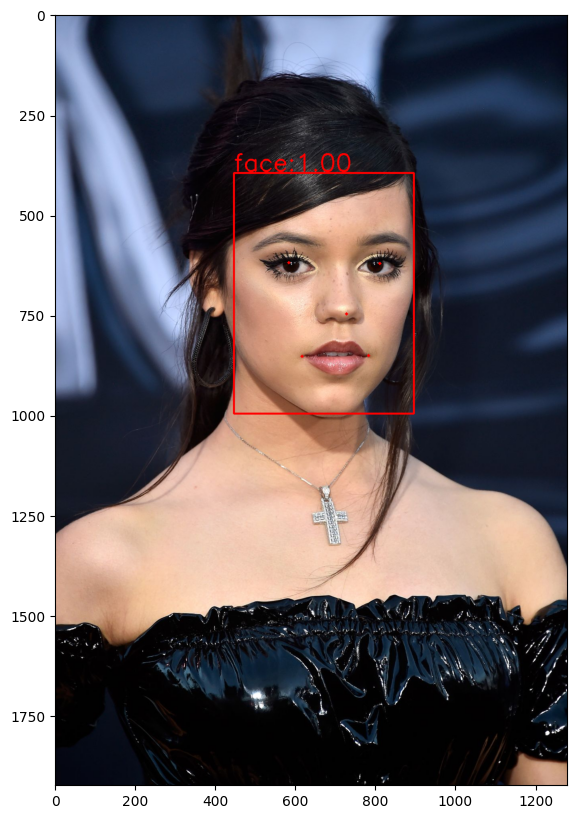

In [10]:
# set image size
img_size = (150, 150)

# copy and save the default image that we loaded before to a new variable
img_with_prediction = np.copy(image)

for i in output:
  x, y, w, h = i['box']
  roi = img_with_prediction[y : y+h, x : x+w]
  data = cv2.resize(roi, img_size) / 255
  data = data.reshape((1,) + data.shape)
  scores = model.predict(data)
  target = np.argmax(scores, axis=1)[0]

  cv2.rectangle(img=img_with_prediction, pt1=(x,y), pt2=(x+w, y+h), color=(255, 0, 0), thickness=2)
  text = "{}:{:.2f}".format(labels[target], scores[0][target])
  cv2.putText(img_with_prediction, text, (x, y-5), cv2.FONT_HERSHEY_SIMPLEX,2,(255,0,0), 4)

plt.figure(figsize=(20, 10))
plt.imshow(img_with_prediction)